In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [65]:
import os, sys
sys.path.append('..')
from glob import glob
from configs import *
from tqdm import tqdm
from utils import *
import numpy as np
import matplotlib.pyplot as plt
from dataset import *
from time import time
tqdm.monitor_interval = 0
import torch
import json
import torch.nn as nn
import numpy as np
torch.manual_seed(0)
torch.cuda.manual_seed(0)
np.random.seed(0)

In [66]:
neighbors = [0, 1, 3]
models = [
    'linear',
    'rnn',
    'mprnn',
]

In [67]:

byn = []
for ni in neighbors:
    bymdl = []
    for mdl in models:
    
        n0 = sorted(glob('../data/logs/%s/*_n%d_log.json' % (mdl, ni)))

        train_mses = []
        eval_mses = []
        final_eval = []
        for logfile in n0:
            with open(logfile) as fl:
                log = json.load(fl)
                tmse, emse, fmse = log
                train_mses.append(tmse)
                eval_mses.append(emse)
                final_eval.append(fmse)

        bymdl.append([
            train_mses,
            eval_mses,
            final_eval,
        ])
#     bymdl.append(byn)
    byn.append(bymdl)
for name, logs in zip(models, byn[0]):
    print(name, len(logs[0]))

linear 80
rnn 80
mprnn 80


0 0.352 & 0.469
0 0.157 & 0.317
0 0.107 & 0.225


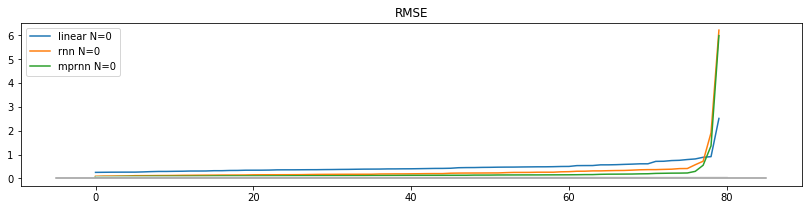

1 0.428 & 0.559
1 0.195 & 0.391
1 0.121 & 0.256


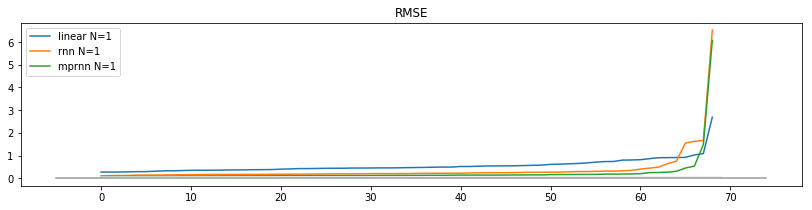

2 0.536 & 0.669
2 0.264 & 0.699
2 0.135 & 0.362


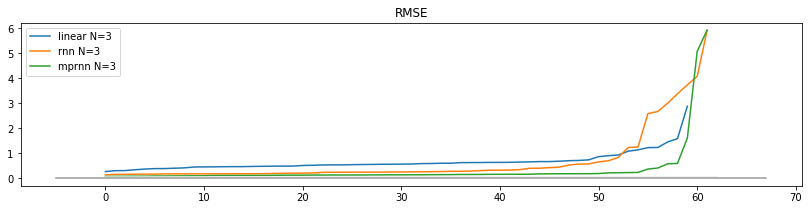

In [74]:
for ni, bymdl in enumerate(byn):
    plt.figure(figsize=(14, 3))
    plt.title('RMSE')

    legs = []
#     for mi, byn in enumerate(bymdl):
    for mi, (tmses, emses, fmses) in enumerate(bymdl):
#         print('N', ni)
#         print(min(fmses))
#         print(max(fmses))
#         print(np.mean(fmses))

#         plt.plot(sorted(np.sqrt(fmses)))
        top = np.mean(sorted(np.sqrt(fmses))[:50])
        tot = np.mean(np.sqrt(fmses))
        print(ni, '%.3f & %.3f' % (top, tot))
        plt.plot(sorted(np.sqrt(fmses)))
#         print(len(fmses))
        legs.append('%s N=%d' % (models[mi], neighbors[ni]))
    #     mrmse = np.mean(np.sqrt(final_eval))
        # plt.plot([0, len(final_eval)], [mrmse, mrmse], color='C1')
#     plt.ylim(-0.25, 1)
    plt.legend(legs)
    plt.plot([0, len(fmses)], [0.05, 0.05], color='#EEEEEE')
    plt.plot([-5, len(fmses)+5], [0, 0], color='#999999')
    plt.show(); plt.close()

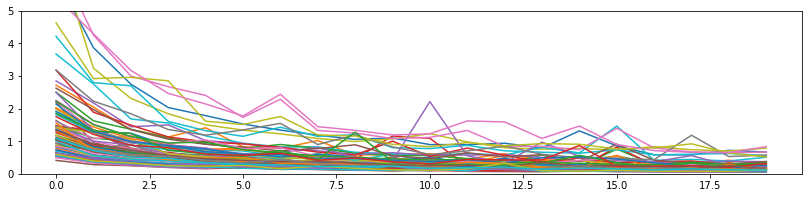

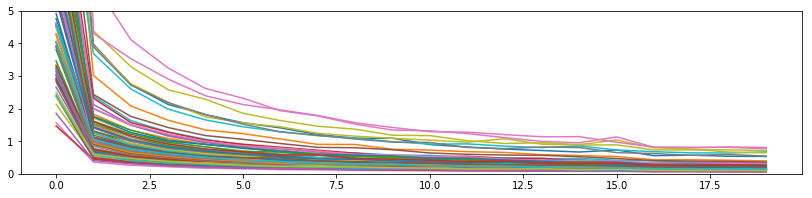

In [19]:
plt.figure(figsize=(14, 3))
for hist in train_mses:
    plt.plot(hist)
plt.ylim(0, 5)
plt.show(); plt.close()

plt.figure(figsize=(14, 3))
for hist in eval_mses:
    plt.plot(hist)
plt.ylim(0, 5)
plt.show(); plt.close()